<a href="https://colab.research.google.com/github/MikelKN/new-phd-with-rawat/blob/main/Version_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading the data

# Version 2: updating with feedback from MilanLP and Rick

Followig the reviews from the Coding Apperitivo, the main suggestion was to consider using similar datasets from the same sources and gernes so as to adress the huge discrepancies in the mean word length between both datasets.


So the plan is to use either social media-social media content- from twitter.

Datasets 1- hate speech : https://arxiv.org/abs/2404.17874 - MANUEL Tonneau

Dataset 2-fake news : https://www.unb.ca/cic/datasets/truthseeker-2023.html

(https://www.kaggle.com/datasets/sudishbasnet/truthseekertwitterdataset2023?select=Twitter+Analysis.csv)

## reference for fake news dataset:

S. Dadkhah, X. Zhang, A. G. Weismann, A. Firouzi and A. A. Ghorbani, "The Largest Social Media Ground-Truth Dataset for Real/Fake Content: TruthSeeker," in IEEE Transactions on Computational Social Systems, 99. 1-15, Oct. 2023.

- In this dataset, we are mostly interested in instances of the tweet whcih strongly agress with the statement. ie tweets that when scrapping aligns perfectly with wat the statement is about so we expect our

  - 5_label_majority = agree and
  - 3_label_majority = agree

- Also we want to retrieved only news that was labelled as fake by politifact. As a result we are interest in label where the

  - Target = False or 0


###. will be discarding this dataset from my analysis

because it it possible that the fake content retrieved from politifact(the statement) are fake, but the keywords used to locate a tweet from it is not really fake news. The only validation provided by the annotators is whether or not the tweet agrees with the statement and not where the tweet is fake too.

Even the politifact dataset too, it is too political and even when labelled as fake news, can be incomplete is the other columns like the statement originator and statment data is not provided. Also it is too america centric.

## reference for hate speech dataset:

Tonneau, M., Liu, D., Fraiberger, S., Schroeder, R., Hale, S. A., & Röttger, P. (2024). From Languages to Geographies: Towards Evaluating Cultural Bias in Hate Speech Datasets. arXiv preprint arXiv:2404.17874.


So far Tonneau and welfake(https://www.kaggle.com/datasets/saurabhshahane/fake-news-classification) are the most preferred for their diversity.
- wel[fake] was retrieved from news articles from
  - Kaggle,
  - McIntire,
  - Reuters,
  - BuzzFeed Political
  
while the
- sources for tonneau include [hate_speech]:

This dataset is a superset (N=360,495) of posts annotated as hateful or not. It results from the preprocessing and merge of all available English hate speech datasets in April 2024

  - Twitter	98121
  - Gab + Reddit	71173
  - synthetic	47037
  - Twitter + Reddit + YouTube	39537
  - Reddit	29791
  - Gab	21949
  - Twitter + Gab	19182
  - Stormfront	10526
  - Parler	10057
  - Twitter + Facebook	6981
  - Facebook/YouTube	3213
  - Fox News	1520
  - YouTube + Reddit	998
  - NGO

included in tonneau:

#### Keeping only non social media data from tonneau, such that it matches the type of news on the welfake:

- Gao and Huang (2017): 1,528 annotated comments from the Fox News website.[fox_news	1520]
- de Gibert et al. (2018): 10,568 annotated sentences from posts and threads from Stormfront.[white_supremacy	10526]
- Qian et al. (2019): 21,747 Gab posts and 7,641 Reddit comments. [benchmark	51182]
  - While Reddit is a social media platform, it has structured discussions that can resemble forums rather than fast-paced social media like Twitter. Gab, on the other hand, is more of an alternative social network that often hosts misinformation, making it potentially relevant for fake news detection.
- anatomy of online hate [anatomy_online_hate	3213]
- Online Misogyny: (Salminen et al., 2018) [online-misogyny	6130]
- EDOS	19991
- ETHOS: an Online Hate Speech Detection Dataset (Mollas et al., 2022):[ETHOS	998]
- NGO - [CONAN	408]

- Röttger et al. (2021): 3,728 synthetic entries designed for hate speech detection.


### dataset	used for my similations Feb 13, 2025
* benchmark	51182
* EDOS	19991
* white_supremacy	10526
* anatomy_online_hate	3213
* fox_news	1520
* ETHOS	998
* CONAN	408
* online-misogyny	6130


learning from the worst	41131
measuring-hate-speech	39537
toraman	29518
davidson	24781
CAD	23661
GHC	21949
east_asian	20000
hatexplain	19182
Parler	10057
melsherief	8808
hasoc	6981
hatemoji-build	5906
MLMA	5640
are_you_a_racist	5462
hateful_symbols	2192
call_me_sexist	1341
compliment_sexist	379



# Version update 3: Following Rick and Marcel's Feedbcaks

- Do not restrict the length of the text you are trying to study
- Fake news? Use more news data to compensate the fake tweets data you currently have. First assess your model on another fake news and hate speech dataset and make some inference on those.
- Find a way to define the kind of correlation i am getting- establish a benchmarck for correlation.
- Update the prompt to something more scholarly
- Leverage LLMS for the classifications
- Look into T-SNE/ Dimensionality reduction.


Other datasets to consider(non tweets datasets):

## Fake news: https://www.kaggle.com/datasets/saurabhshahane/fake-news-classification **
-(WELFake) is a dataset of 72,134 news articles with 35,028 real and 37,106 fake news. For this, authors merged four popular news datasets (i.e. Kaggle, McIntire, Reuters, BuzzFeed Political) to prevent over-fitting of classifiers and to provide more text data for better ML training.

***Mody, Devansh; Huang, YiDong; Alves de Oliveira, Thiago Eustaquio (2022), “A Curated Hate Speech Dataset”, Mendeley Data, V1, doi: 10.17632/9sxpkmm8xn.1


## Import librabires and preprocess


In [ ]:
!pip install emoji num2words contractions tqdm fire --quiet
!pip install --upgrade openai cohere transformers --quiet
!pip install -U kaleido --quiet #to print and save the sankey charts

import transformers
from transformers import pipeline, AutoTokenizer

import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

from google.colab import userdata

#NLTK Lib
import nltk
nltk.download('all', quiet=True)
from nltk.corpus import wordnet, stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
stopwords_list = set(stopwords.words("english"))

from num2words import num2words
from openai import OpenAI
from tqdm import tqdm
from pathlib import Path
from IPython.display import display
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import time
import logging
import fire

import random
import torch
import emoji
import re
import time
import contractions
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import gensim.downloader as api
import plotly.graph_objects as go
import torch.nn.functional as F
from torch.nn.functional import softmax

pd.options.display.max_colwidth = 500 # limit to the lenght of token that should be displayed on the daatsets
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

import os
os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')
os.environ["NEW_OPEN_AI"] = userdata.get("NEW_OPEN_AI")
os.environ["HF_API_KEY"] = userdata.get("HF_API_KEY")
os.environ["COHERE_PROD"] = userdata.get("COHERE_PROD")

import kaggle

#datasets from kaggle
!kaggle datasets download -d elgringofrances/english-hate-speech-superset
!kaggle datasets download -d sudishbasnet/truthseekertwitterdataset2023
!kaggle datasets download -d saurabhshahane/fake-news-classification
!kaggle datasets download -d rmisra/politifact-fact-check-dataset
!kaggle datasets download -d waalbannyantudre/hate-speech-detection-curated-dataset

!unzip english-hate-speech-superset.zip
!unzip truthseekertwitterdataset2023.zip
!unzip fake-news-classification.zip
!unzip politifact-fact-check-dataset.zip
!unzip hate-speech-detection-curated-dataset.zip

!git clone https://github.com/MikelKN/abbreviation-list-english.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.5/163.5 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.3/472.3 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.9/252.9 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 22.3 MB/s eta 0:00:00
Mounted at /content/drive
Dataset URL: https://www.kaggle.com/datasets/elgringofrances/english-hate-speech-superset
License(s): MIT
 79% 18.0M/22.8M [00:00<00:00, 79.1MB/s]
100% 22.8M/22.8M [00:00<0

In [ ]:
!kaggle datasets download -d waalbannyantudre/hate-speech-detection-curated-dataset
!unzip hate-speech-detection-curated-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/waalbannyantudre/hate-speech-detection-curated-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
hate-speech-detection-curated-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  hate-speech-detection-curated-dataset.zip
replace HateSpeechDataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace HateSpeechDatasetBalanced.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


# Loading and Reading the datatsets

In [ ]:
hate_barrel = pd.read_csv('/content/en_hf_102024.csv', low_memory=False)
hate_barrel = hate_barrel.dropna(subset=["text"])
hate_barrel_true = hate_barrel[hate_barrel['labels'] == 1]
print(len(hate_barrel_true))
fake_curated = pd.read_csv('WELFake_Dataset.csv', index_col = 0) #news articles from Kaggle, McIntire, Reuters, BuzzFeed Political
fake_news_true = fake_curated[fake_curated['label'] == 1]
keppers = ['anatomy_online_hate', 'ETHOS', 'fox_news', 'EDOS', 'online-misogyny', 'white_supremacy', 'benchmark', 'CONAN']
hate_news_df= hate_barrel_true[hate_barrel_true['dataset'].isin(keppers)]

hate_news_df.shape

97477


(28968, 7)

In [ ]:
fake_curated.label.value_counts()

,count
label,
1,37106
0,35028


In [ ]:
hate_parler= hate_barrel_true[hate_barrel_true['dataset'] == 'Parler']
hate_parler.sample(30)

,text,labels,source,dataset,nb_annotators,tweet_id,post_author_country_location
225516,Another reason every muslim needs to be deported or killed! #nomuslimcanbetrusted!,1.0,Parler,Parler,3,NaN,unknown
226033,The media is a gross disgusting disaster! Biden and Obama hate America and we will NOT let them have it! F you!,1.0,Parler,Parler,3,NaN,unknown
221489,You would have to be a special kind of idiot to swallow the demoKKKrats shit. They are all pathological liars and evil scumbags.,1.0,Parler,Parler,3,NaN,unknown
225700,This FAT fucking COW is a health Secretary?\n\nPennsylvania Health Secretary Dr. Levine Issues One-Night Suspension of Alcohol Sales Starting Night Before Thanksgiving,1.0,Parler,Parler,3,NaN,unknown
226621,All I can figure is being that most big league sports are majority black they have no choice but to bow to the players. It's the only thing I can imagine would make someone like Roger Goodell do the tom fuckery that is going on. Now they won't have celebrities/ singing the anthem? smmfh,1.0,Parler,Parler,3,NaN,unknown
225111,Washington State Governor Jay Inslee is a POS! Heâs needs to go Now! Heâs a commie bastard!,1.0,Parler,Parler,3,NaN,unknown
226316,The Feds need to go in and wipe out every single BLM and Antifa thug in Louisville KY.,1.0,Parler,Parler,3,NaN,unknown
221215,"Dear Black Lives Matter,\n\nYou think funding is available to support your riots?\n\nCan you begin to contemplate the amount of money that has been spent and made by Democrats to riot on you over the last 50 years?\n\nWARNING:\nIf you are the kind of snowflake that hates speech you should go fuck yourself and not watch the following Political Satire ...\nBlazing Saddles:",1.0,Parler,Parler,3,NaN,unknown
219129,Impoverish Americans via Covid-19 lockdowns and give their money to US enemies .,1.0,Parler,Parler,3,NaN,unknown
221116,"#liberallogic hairy armpit and bloody Jean wearing brain washed baby killing liberal women want equality without working for it......I'm all for this experiment, let's try integrating the prison systems since there is no gender.....I volunteer them to prove their point. #maga #trump2020 #liberalismisamentaldisorder",1.0,Parler,Parler,3,NaN,unknown


In [ ]:
hate_curated = pd.read_csv('HateSpeechDatasetBalanced.csv') #the hate speech dataset.csv file is text preprocessed

hate_barrel = pd.read_csv('/content/en_hf_102024.csv', low_memory=False)

fake_truthseek = pd.read_csv('/content/Truth_Seeker_Model_Dataset.csv',index_col=0)
fake_truthseek = fake_truthseek[(fake_truthseek['3_label_majority_answer'] == 'Agree') & (fake_truthseek['5_label_majority_answer'] == 'Agree')]

hate_UTR = pd.read_parquet("hf://datasets/ucberkeley-dlab/measuring-hate-speech/measuring-hate-speech.parquet")
hate_UTR = hate_UTR[hate_UTR['hatespeech'] == 2]
hate_UTR = hate_UTR[['text', 'hatespeech', 'hate_speech_score', 'sentiment']].reset_index(drop=True)

print(f"tThe Shape of the fake news curated dataset is {fake_curated.shape} and \n"
      f"the distribution of binary hate speech labels is {fake_curated.label.value_counts()}\n\n")

print(f"\nThe shape of the Fake news truthseek dataset is {fake_truthseek.shape} and\n"
      f"distribution of binary fake news labels is \n{fake_truthseek['5_label_majority_answer'].value_counts()}\n\n")

print(f"The shape of the Hate speech by Tonneau dataset is {hate_barrel.shape} and\n"
      f"distribution of binary fake news labels is \n {hate_barrel.labels.value_counts()}")

print(f"The shape of the Hate spech for Youtube, Twitter and Reddit dataset is {hate_UTR.shape} and\n"
      f"distribution of binary fake news labels is \n{hate_UTR['hatespeech'].value_counts()}")

NameError: name 'fake_curated' is not defined

In [ ]:
fake_truthseek.BinaryNumTarget.value_counts()

,count
BinaryNumTarget,
1.0,27960
0.0,26375


In [ ]:
fake_curated.sample(5)

,title,text,label
25320,"Berlin Crash Is Suspected to Be a Terror Attack, Police Say - The New York Times","BERLIN — The Berlin police said early Tuesday that the killing of at least 12 people and the wounding of dozens more when a truck plowed through a Christmas market on Monday night was “a suspected terrorist attack. ” In a statement, the police added that they were working swiftly and with “necessary care” in the investigation. The truck jumped the sidewalk about 8 p. m. near the Kaiser Wilhelm Memorial Church, whose jagged spire, a reminder of the bombings during World War II, is one of t...",0
15077,Sales to people on terrorism watch lists should be delayed: NRA,"WASHINGTON (Reuters) - The National Rifle Association said on Wednesday it stood by its position on terrorism watch lists and access to firearms, saying sales to potential buyers who are on the lists should be delayed while they are investigated by the FBI. In a statement, the gun lobbying group said it welcomed a meeting with Republican presidential candidate Donald Trump. It also said protections needed to be put in place to allow people wrongfully put on a terrorism watch list to be remov...",0
47867,U.S. expands Central American refugee screening program,"WASHINGTON (Reuters) - The Obama administration announced a broad expansion on Tuesday of a program to let people fleeing violence in El Salvador, Guatemala and Honduras enter the United States as refugees, and said Costa Rica agreed to temporarily shelter some of those with no other recourse. Under the plan, Costa Rica will host up to 200 applicants at a time deemed too vulnerable to remain in their homelands while the U.S. Department of Homeland Security evaluates them for possible resettl...",0
7015,"Arizona’s Largest Newspaper Breaks 125 Year Tradition, Backs Democrat For President","Since 1890, The Arizona Republic, now the state s largest and most popular newspaper, has seen over 30 presidential elections. And every time, they have endorsed the Republican contender Eisenhower, Nixon, Goldwater, Ford, Reagan, H.W. Bush, Dole, Bush, McCain, and Romney.This year, something changed dramatically for the editorial board they put country over party, and endorsed Hillary Clinton, the Democrat, over Donald Trump, the Republican.Once again, Hillary has broken a glass ceiling...",1
9372,Revelation Unleashed: Unlocking The Mysteries Of The Bible’s Most Mysterious Book,"Revelation Unleashed: Unlocking The Mysteries Of The Bible’s Most Mysterious Book On this episode of Rightly Dividing, join us as we drop some pins and create an easy to understand roadmap to the amazing, awesome, and very much knowable book of Revelation! Join us as we apply Paul’s command found in 2 Timothy 2:15 to ‘rightly divide’ our Bible and put everything in it’s proper perspective and place. \n“ And one of the elders saith unto me, Weep not: behold, the Lion of the tribe of Juda,...",1


In [ ]:
# hate_barrel.dataset.value_counts()
hate_barrel.source.value_counts()

source = ['Stormfront', 'Fox News', 'NGO', 'Facebook/YouTube', 'YouTube + Reddit']

,count
source,
Twitter,98121
Gab + Reddit,71173
synthetic,47037
Twitter + Reddit + YouTube,39537
Reddit,29791
Gab,21949
Twitter + Gab,19182
Stormfront,10526
Parler,10057


In [ ]:
dataset_info = {
    "Dataset": [
        "Fake News Curated",
        "Fake News TruthSeek",
        "Fake News TruthSeek",
        "Hate Speech Barrel",
        "Hate Speech UTR",
        "politi_fact"
    ],
    "Shape": [
        fake_curated.shape,
        fake_truthseek.shape,
        fake_truthseek.shape,
        hate_barrel.shape,
        hate_UTR.shape,
        politifact.shape
    ],
    "Value Counts": [
        fake_curated.label.value_counts().to_dict(),
        fake_truthseek['5_label_majority_answer'].value_counts().to_dict(),
        fake_truthseek['3_label_majority_answer'].value_counts().to_dict(),
        hate_barrel.labels.value_counts().to_dict(),
        hate_UTR['hatespeech'].value_counts().to_dict(),
        politifact['verdict'].value_counts().to_dict()
    ]
}
dataset_summary = pd.DataFrame(dataset_info)
dataset_summary

,Dataset,Shape,Value Counts
0,Fake News Curated,"(72134, 3)","{1: 37106, 0: 35028}"
1,Fake News TruthSeek,"(134198, 8)","{'Agree': 54335, 'Mostly Agree': 53806, 'NO MAJORITY': 22605, 'Mostly Disagree': 2891, 'Disagree': 561}"
2,Fake News TruthSeek,"(134198, 8)","{'Agree': 128471, 'Disagree': 5727}"
3,Hate Speech Barrel,"(360495, 7)","{0.0: 263016, 1.0: 97477}"
4,Hate Speech UTR,"(46021, 4)",{2.0: 46021}


#Datasets reading and preprocessing

In [ ]:
class Preprocessor:
    def __init__(self):
        self.patterns= {
            "multi_space": r' +',
            "user_mention": r'@\w+',
            "new_line": r'\n+',
            "hyperlink": r'https?://\S+|www\.\S+',
            "accented": r'\^[a-zA-Z0-9]+',
            "date": r'\b(?:\d{1,2}(?:st|nd|rd|th)?\s(?:Jan|Feb|Mar|...|Dec)[a-z]*\s?\d{4}?)\b',
            "time": r'\b\d{1,2}:\d{2}(?::\d{2})?\s?(?:[aApP][mM])?\b',
            "special_characters": r'[_"\-%;()|+&=*%.,!?:#$@[\]/]',
            "numbers": r'\d+',
            "amper_begin_pattern" : r'^',
            "punctuations" : r'[^\w\s]'
        }
    def expand_abbrev_profanity(self, profanity_df, text):
        for _, row in profanity_df.iterrows():
            abbr = row['abbrv']
            long = row['long']
            text = re.sub(rf'\b{re.escape(abbr)}\b', long, text, flags=re.IGNORECASE)
        return text

    def convert_emojis(self, text):
        return emoji.demojize(text).replace(":", "")

    def number_to_words(self, match):
        return num2words(int(match.group()))

    def process_nums(self, text):
        return re.sub(r'\d+', self.number_to_words, text)

    def remove_stopwords(self, text):
        word_tokens = word_tokenize(text)
        return ' '.join([word for word in word_tokens if word not in stopwords_list])

    # Function to get POS tag for lemmatization
    def get_wordnet_pos(self,word):
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {
            'J': wordnet.ADJ,
            'N': wordnet.NOUN,
            'V': wordnet.VERB,
            'R': wordnet.ADV }
        return tag_dict.get(tag, wordnet.NOUN)

    # Function to lemmatize text
    def lemmatize_text(self,text):
        tokens = word_tokenize(text.lower())
        lemmatized_tokens = [lemmatizer.lemmatize(word, self.get_wordnet_pos(word)) for word in tokens if word.isalpha()]
        return ' '.join(lemmatized_tokens)

    def text_preprocessing(self, text):
        text = re.sub(self.patterns["date"], '', text)
        text = re.sub(self.patterns["time"], '', text)
        text = self.convert_emojis(text)
        text = re.sub(self.patterns["hyperlink"], '', text)
        text = re.sub(self.patterns["user_mention"], '', text)
        text = re.sub(self.patterns["new_line"], ' ', text)
        text = re.sub(self.patterns["amper_begin_pattern"], '', text)
        text = contractions.fix(text)
        text = self.lemmatize_text(text)
        text = re.sub(self.patterns["multi_space"], ' ', text)
        text = re.sub(self.patterns["special_characters"], ' ', text)
        text = self.process_nums(text)
        text = re.sub(self.patterns["accented"], '', text)
        text = self.remove_stopwords(text)
        text = re.sub(self.patterns["punctuations"], '', text)
        text = text.lower()
        return text.strip()
#output path to save the images
path = Path('/content/drive/MyDrive/PhD with Rawat/obj1_d1')
class Read:
    @staticmethod
    def read_and_filter_dataset (filepath, text_column):
        data = pd.read_csv(filepath, low_memory=False)
        data.dropna(inplace=True)
        return data

class PlotUtils:
    def __init__(self, colors= ['green', 'red', 'orange', 'blue'], figsize=(7, 4)):
        self.figsize = figsize
        self.colors = colors
    def plot_sentiment_distribution(self, sentiment_columns, dataset_names, image_name, model_name):
        unique_sentiments = set()
        sentiment_counts_list = []
        for sentiment_column in sentiment_columns:
          sentiment_column_normalized = sentiment_column.str.lower()
          sentiment_counts = sentiment_column_normalized.value_counts()# Count the sentiment labels for each dataset
          sentiment_counts_list.append(sentiment_counts)
          unique_sentiments.update(sentiment_counts.index)
        sentiment_df = pd.DataFrame({
            sentiment : [sentiment_count.get(sentiment, 0) for sentiment_count in sentiment_counts_list]
            for sentiment in unique_sentiments
        })
        sentiment_df.index = dataset_names
        sentiment_df.plot(kind='barh', stacked=False, figsize=self.figsize, color=self.colors[:len(unique_sentiments)])
        plt.title(f'{model_name} Sentiment Labels Distribution Across Datasets')
        plt.xlabel('Dataset')
        plt.ylabel('Count')
        plt.xticks(rotation=0)
        plt.legend(title="Sentiment", loc='best')
        # plt.savefig(path/image_name)
        plt.show()

class LLM_sentiment:
    def sentiment_gpt(self, event, model_name= 'gpt-4o-mini'):
      prompt = f"Given the following event: '{event}', identify the primary sentiment it evokes. \
      Select only one of the following sentiment labels (in lowercase): 'positive', 'negative', or 'neutral'. \
      Provide only the sentiment label without any additional explanation."

      client = OpenAI(
          api_key = userdata.get("NEW_OPEN_AI"),
          )
      input = [{"role": "system", "content": "You are a sentiment analysis expert."},
              {"role": "user","content": prompt,}]
      chat_completion = client.chat.completions.create(
          messages=input,
          model=model_name,
      )
      output = chat_completion.choices[0].message.content
      return output

    def prompt_cohere(self, event, model_name= 'command'):

      prompt = f"Given the following event: '{event}', identify the primary sentiment it evokes. \
      Select only one of the following sentiment labels (in lowercase): 'positive', 'negative', or 'neutral'. \
      Provide only the sentiment label without any additional explanation."

      co_api = cohere.Client('RFXnp5bU4XQc3OAvUYaCZRc9SFYpoEgPXAVWVeAW')
      response = co_api.chat(
          message=prompt,
          model=model_name,
      )
      return response.text

    def sentiment_gpt_chain(self, event, model_name='gpt-4o-mini'):
      prompt = f"""
      Given the following event: '{event}', determine the primary sentiment it evokes.

      Step 1: Identify the sentiment as one of the following sentiment labels (in lowercase): 'positive', 'negative', or 'neutral'.
      Step 2: Justify your choice in a few words based on the content and tone of the event. Make it brief.
      Step 3: Assign a confidence score (between 0 and 1) based on how strongly the sentiment is expressed.

      Your response should be in the following structured format:

      Sentiment: ['positive', 'negative', or 'neutral']
      Justification: [brief explanation]
      Confidence: [value between 0 and 1]"""

      client = OpenAI(api_key=userdata.get("NEW_OPEN_AI"))

      input = [
          {"role": "system", "content": "You are a sentiment analysis expert."},
          {"role": "user", "content": prompt},
      ]

      chat_completion = client.chat.completions.create(
          messages=input,
          model=model_name,
      )

      output = chat_completion.choices[0].message.content

      # Parse the structured response
      lines = output.strip().split("\n")
      sentiment = lines[0].split(": ")[1].strip().lower().replace("'", "").replace('"', "")  # Remove quotes and standardize
      justification = lines[1].split(": ")[1].strip()
      confidence = float(lines[2].split(": ")[1].strip())  # Convert confidence score to float
      return {"sentiment": sentiment, "explanation": justification, "confidence_score": confidence}

class BERTemotion:
      # reference https://huggingface.co/SamLowe/roberta-base-go_emotions
    def __init__(self,  max_length = 512, batch_size = 10, figsize=(20, 10),
                 emotions_color = None,  sent_model_name="SamLowe/roberta-base-go_emotions"):
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.max_length = max_length
        self.figsize=figsize
        self.batch_size = batch_size
        self.tokenizer = AutoTokenizer.from_pretrained(sent_model_name)
        self.classifier = pipeline(task="text-classification",
                                   model=sent_model_name,
                                   tokenizer=self.tokenizer,
                                   top_k=True,
                                   truncation=True,
                                   device=0 if torch.cuda.is_available() else -1)
        self.emotion_colors = {
                  "admiration": "gold",
                  "anger": "cadetblue",
                  "approval": "orange",
                  "annoyance": "red",
                  "amusement": "green",
                  "caring": "pink",
                  "curiosity": "darkviolet",
                  "desire": "cornflowerblue",
                  "disappointment": "bisque",
                  "disapproval": "moccasin",
                  "disgust": "silver",
                  "love": "turquoise",
                  "neutral": "tomato",
                  "optimism": "yellow",
                  "sadness": "pink"
                  }

    def predict(self, texts):
          truncated_texts = [
              self.tokenizer.decode(
                  self.tokenizer(text, truncation=True, max_length=self.max_length)['input_ids'],
                  skip_special_tokens=True)
              for text in texts
          ]

          # batch processing for better GPU efficiency
          model_outputs = self.classifier(truncated_texts,
                                          truncation=True,
                                          padding=True,
                                          batch_size=self.batch_size)
          results = []
          for output in model_outputs:
              top_emotion = output[0]
              results.append({
                  "emotion": top_emotion['label'],
                  "emotion_score": top_emotion['score']
              })
          return results

    def plot_emotion_distribution(self, emotion_columns, dataset_names, image_name, model_name='Roberta_Base_go'):
          if len(emotion_columns) != len(dataset_names):
              raise ValueError("The number of emotion labels and names must match.")
          emotion_dict = {name: emotion_column.value_counts() for name, emotion_column in zip(dataset_names, emotion_columns)}
          emotion_df = pd.DataFrame(emotion_dict).fillna(0).sort_index()
          emotion_df.plot(kind='barh', stacked=False, figsize=self.figsize, color=['skyblue', 'salmon'])
          plt.title(f'{model_name} emotion Labels Distribution Across Datasets')
          plt.ylabel('Emotions')
          plt.xlabel('Counts')
          plt.legend(title="Data", loc='best')
          # plt.savefig(path/image_name)
          plt.show()

    def emotion_counts(self, data):
      return data.value_counts().to_dict()

    def create_sankey_chart(self, data, dataset_name, image_name):
        emotion_count_dict = self.emotion_counts(data)
        all_emotions = list(emotion_count_dict.keys())
        nodes = all_emotions + [dataset_name]
        node_indices = {node: idx for idx, node in enumerate(nodes)}
        links = {
            "source": [],
            "target": [],
            "value": [],
            "color": []
        }
        for emotion, count in emotion_count_dict.items():
            links["source"].append(node_indices[emotion])
            links["target"].append(node_indices[dataset_name])
            links["value"].append(count)
            links['color'].append(self.emotion_colors.get(emotion.lower(), "gray"))
        fig = go.Figure(go.Sankey(
            node=dict(
                pad=15,
                thickness=20,
                line=dict(color="black", width=0.5),
                label=nodes),
            link=dict(
                source=links["source"],
                target=links["target"],
                value=links["value"],
                color=links["color"])
        ))
        fig.update_layout(title_text=f"Emotion Flow for {dataset_name}", font_size=10)
        # fig.write_image(path/image_name)
        fig.show()

class Analysis:
    def __init__(self, colors= ['skyblue', 'salmon', 'green', 'red', 'orange', 'blue' ], figsize = (7, 4)):
        self.figsize = figsize
        self.colors = colors

    def exploratory_data_analysis(self, data, text_column):
        data['word_count'] = data[text_column].str.split().str.len() if text_column else 0 #num of words in sentence
        return data

    def plot_mean_word_length(self, datasets, dataset_names, image_name):
        mean_word_counts = [dataset['word_count'].mean() for dataset in datasets]
        results_df = pd.DataFrame({
            "Dataset": dataset_names,
            "Mean Word counts": mean_word_counts
        })
        plt.figure(figsize=self.figsize)
        plt.barh(results_df["Dataset"], results_df["Mean Word counts"], color=self.colors[:len(dataset_names)])
        plt.ylabel("Dataset")
        plt.xlabel("Mean Word counts")
        plt.title("Mean Word counts Comparison")
        plt.tight_layout()
        # plt.savefig(f"{image_name}.png")
        plt.show()

'''This is the chosen model to calculate the fake news and hate speech embeddings. see https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2
It is a sentence transformer types, Model size is small, manageable and memory efficient, currently very hot in the community with 69M monthly downloads,
performs well on pair classification and STS task'''
class AllCosineSimilarity:
    def __init__ (self, batch_size = 5, model_name= "sentence-transformers/all-MiniLM-L6-v2"):
      self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
      self.tokenizer = transformers.AutoTokenizer.from_pretrained(model_name)
      self.model = transformers.AutoModel.from_pretrained(model_name).to(self.device)
      self.batch_size = batch_size

    #Mean Pooling - Take attention mask into account for correct averaging
    def mean_pooling(self, model_output, attention_mask):
      token_embeddings = model_output[0] #First element of model_output contains all token embeddings
      input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
      return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

    def tokenize_text(self, data):
      if isinstance(data, pd.Series):
          data = data.tolist()
      return self.tokenizer(
          data,
          truncation=True,
          padding=True,
          max_length=512,
          return_tensors="pt"
      )

    def compute_embeddings(self, tokenized_input):
        tokenized_input = {k: v.to(self.device) for k, v in tokenized_input.items()}
        with torch.no_grad():
            model_output = self.model(**tokenized_input)
        embeddings = self.mean_pooling(model_output, tokenized_input['attention_mask'])
        return embeddings

    def normalize_embeddings(self, embeddings):
      return F.normalize(embeddings, p=2, dim=1)

    def calculate_cosine_similarity(self, hate_embeddings, fake_embeddings):
      return hate_embeddings @ fake_embeddings.T

    def visualize_similarity(self, cosine_sim_matrix):
        cosine_sim_matrix_np = cosine_sim_matrix.detach().cpu().numpy()
        average_similarity = cosine_sim_matrix.mean().item()
        print(f"\n\nAverage Cosine Similarity(in percentage):{round(average_similarity*100, 2)}%")
        print("\n\n")
        sns.heatmap(cosine_sim_matrix_np, cmap="jet", xticklabels=False, yticklabels=False)
        plt.title("Cosine Similarity Heatmap")
        plt.xlabel("Fake News Embeddings")
        plt.ylabel("Hate Speech Embeddings")
        return average_similarity

    def visualize_histo(self, cosine_sim_matrix, bin_size=0.05):
        cosine_sim_matrix_np = cosine_sim_matrix.detach().cpu().numpy()
        similarity_values = cosine_sim_matrix_np.flatten()
        average_similarity = np.mean(similarity_values)
        bins = np.arange(0, 0.7, bin_size)
        # Plot histogram
        plt.figure(figsize=(8, 5))
        sns.histplot(similarity_values, bins=bins, kde=False, color="skyblue", edgecolor="black")
        plt.title("Cosine Similarity Histogram Distri.")
        plt.xlabel("Cosine Similarity Score")
        plt.ylabel("Count of Pairs")
        plt.xticks(np.arange(0, 0.7, 0.1))
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.savefig(path/'similarity_Histogram.png')

# New implementation after Rawat Review 2025

## Main Idea

- Leverage the work of Mosley wt al. >> https://doi.org/10.1093/pnasnexus/pgae111

  - ### Premise from MOSLEY et al.: Shows that false headlines contain more hateful langauges.
    - Use linear regression
    - Use Google API to attribute hate scores
    - Levergaes headlines from politifact only
    

  - My innovation:
    - Leveraged healines from
      - Welfake since it is from more diverse sources e.g Kaggle, Reuters, Mcintire and BuzzFeed >> https://www.kaggle.com/datasets/saurabhshahane/fake-news-classification
      - Add in unique samples from Truthseek (1058 Unique statements) >> https://www.kaggle.com/datasets/sudishbasnet/truthseekertwitterdataset2023?select=Truth_Seeker_Model_Dataset.csv
      - Create a balanced, ddiverse(not only politifact), and large.

    - Implement the same simulation as mosley to confirm their outcome and propose a baseline i.e using linear regression.

     - Use the emotions spectrum form the https://huggingface.co/SamLowe/roberta-base-go_emotions to get a baseline emotion analysis.

    - Generate a new hate sentiment, hate scores, emotion and emotion scores using open source LLM either GPT40-Mini or Llama.
    
    Prompt may look like:

        ***Given the following event: '{event}', determine the primary sentiment and emotion it evokes.

        Step 1: Identify the sentiment as one of the following sentiment labels (in lowercase): 'positive', 'negative', or 'neutral'.
        
        Step 2: Assign a confidence score (between 0 and 1) based on how strongly the sentiment is expressed.

        Step 3: choose the best emotion that best corresponds to the headlines amongs these>> [set of emotions spectrum form the https://huggingface.co/SamLowe/roberta-base-go_emotions ]

        Step 4: Assign a confidence score (between 0 and 1) based on how strongly the emotion is expressed.

    - Compare the hate and emotion scores from the baseline methods and the LLM-based method.
      - Use statistical tests (e.g., paired t-tests, correlation analyses) to measure differences in scores.
      - Qual analysiss: Conduct a detailed error analysis or case studies on select headlines where the LLM-based method provides a more nuanced interpretation than the baseline.
      - Explore whether certain emotions (e.g., anger or disgust) are more prevalent in false headlines, especially when paired with high hate scores.
      - Analyze how the combined scores (hate and emotion) correlate with the misinformation labels. To know if :
        -  Higher hate scores are associated with a higher likelihood of the headline being false.
        - Whether certain emotions are more prevalent in false headlines compared to true headlines.
        - Beyond looking at each predictor individually, you want to examine if there is an interaction effect. For instance, does a high hate score combined with an emotion like anger have a stronger association with misinformation than a high hate score with a neutral emotion? In statistical terms, this means including an interaction term (e.g., hate_score × anger) in your model.

    - Further improvement:
      - Human-in-the-Loop Evaluation: Where experts review a subset of the outputs to validate the LLM’s performance.




# Old implementation before Rawat Revview Feb 15, 2025

Device set to use cpu


Size of hate_news_df: 28964
Size of fake_news_df: 28848

Starting emotion analysis!


Plotting the emotion distribution!



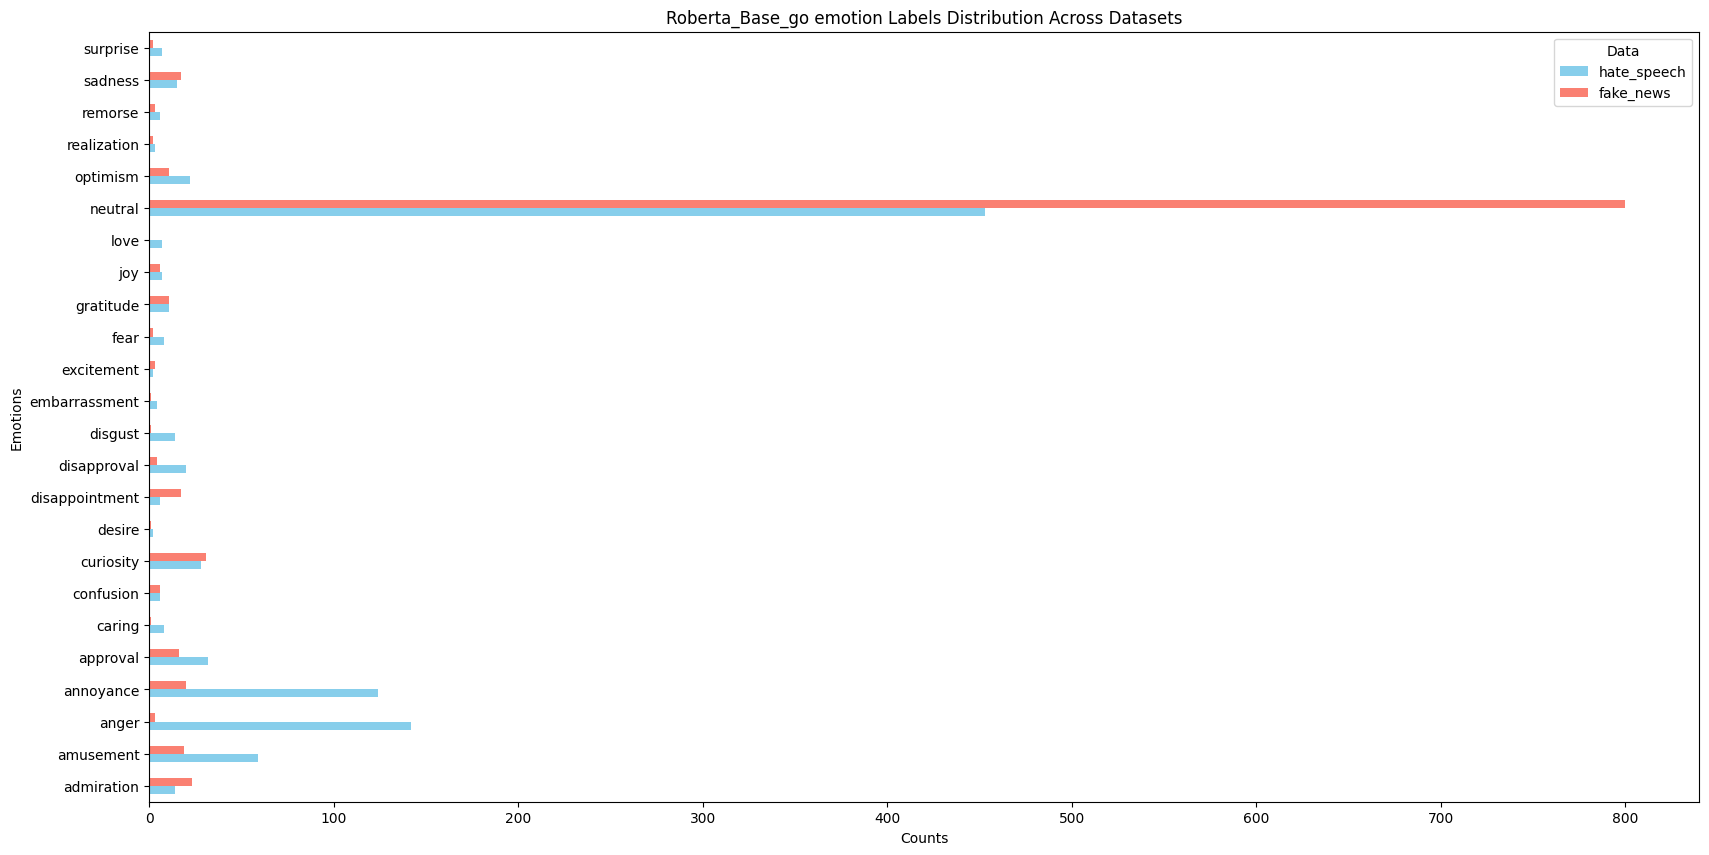


Startin text preprocessing!


Plotting the mean word length for both datasets



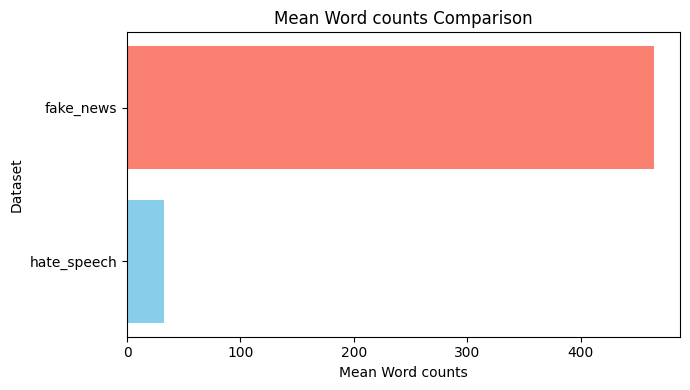


Assessing cosine similarity between datasets!



++++++++++++++++++Building the HATE_SPEECH sankey charts++++++++++++++++++




++++++++++++++++++Building the FAKE_NEWS sankey charts++++++++++++++++++




Average Cosine Similarity(in percentage):12.76%





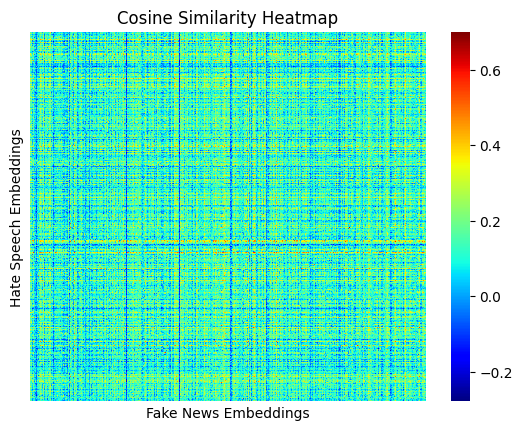

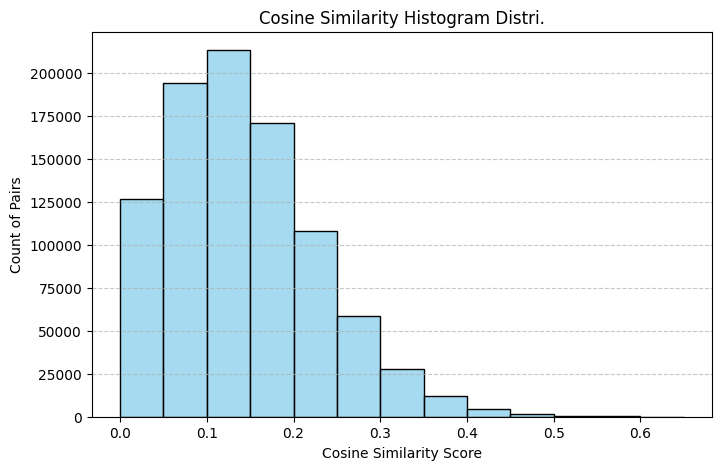

In [ ]:
def main():
   # Initialize the classes
    preprocessor = Preprocessor()
    reader = Read()
    analyser = Analysis()
    emotion = BERTemotion()
    llm_sent = LLM_sentiment()
    plots = PlotUtils()
    minilm_sim = AllCosineSimilarity()
    kaggle.api.authenticate()

    #read the datasets
    # hate_speech = reader.read_and_filter_dataset('/content/en_hf_102024.csv', 'text')
    # fake_data = reader.read_and_filter_dataset('/content/Truth_Seeker_Model_Dataset.csv', 'tweet')
    # #remove duplicates and keep only tthe first occurences
    # hate_speech.drop_duplicates(keep='first', inplace = True, ignore_index= True)
    # fake_data.drop_duplicates(keep='first', inplace = True, ignore_index= True)

    # fake_news = fake_data[(fake_data['3_label_majority_answer'] == 'Agree') & (fake_data['5_label_majority_answer'] == 'Agree')]
    # # Extract DataFrame to include only rows with label = 1
    # hate_speech_super_df = hate_speech.loc[hate_speech['labels'] == 1, ['text', 'labels']].sample(n=10, random_state=42).reset_index(drop=True)
    # fake_news_df = fake_news.loc[fake_news['BinaryNumTarget'] == 0, ['tweet', 'BinaryNumTarget']].sample(n=10, random_state=42).reset_index(drop=True)

    hate_barrel = pd.read_csv('/content/en_hf_102024.csv', low_memory=False)
    hate_barrel = hate_barrel.dropna(subset=["text"])
    hate_barrel.drop_duplicates(keep='first', inplace = True, ignore_index= True)
    hate_barrel_true = hate_barrel[hate_barrel['labels'] == 1]
    keppers = ['anatomy_online_hate', 'ETHOS', 'fox_news', 'EDOS', 'online-misogyny', 'white_supremacy', 'benchmark', 'CONAN']
    hate_news_df= hate_barrel_true[hate_barrel_true['dataset'].isin(keppers)]

    print(f"Size of hate_news_df: {len(hate_news_df)}")

    fake_curated = pd.read_csv('WELFake_Dataset.csv', index_col = 0) #news articles from Kaggle, McIntire, Reuters, BuzzFeed Political
    fake_curated = fake_curated.dropna(subset=['text'])
    fake_curated.drop_duplicates(keep='first', inplace = True, ignore_index= True)
    fake_news_df = fake_curated[fake_curated['label'] == 1]

    print(f"Size of fake_news_df: {len(fake_news_df)}")

    hate_news_df = hate_news_df.sample(n=1000, random_state=42).reset_index(drop=True)
    fake_news_df = fake_news_df.sample(n=1000, random_state=42).reset_index(drop=True)

    datasets = {
        ("hate_speech", "text"): hate_news_df,
        ("fake_news", "text"): fake_news_df
    }
    prompt_name = llm_sent.sentiment_gpt_chain
    llm_name = 'gpt4omini'

    # print('\nStarting sentiment analysis!\n')
    # for (_, text_col), dataset in datasets.items():
    #     new_col = ['sentiment', f'{llm_name}_explanation', 'sentiment_score']
    #     dataset[new_col] = dataset[text_col].apply(lambda x: pd.Series(prompt_name(x)))

    # print('\nPlotting sentiment distribution!\n')
    # plots.plot_sentiment_distribution(
    #     [dataset['sentiment'] for dataset in datasets.values()],
    #     [name for name, _ in datasets.keys()],
    #     model_name = llm_name,
    #     image_name=f"senti_distri_{llm_name}.png") # Sentiment Distribution Plot

    print('\nStarting emotion analysis!\n')
    for (name,text_col), dataset in datasets.items():
      predictions = emotion.predict(dataset[text_col].tolist())
      dataset['emotion'] = [result['emotion'] for result in predictions]
      dataset['emotion_score'] = [result['emotion_score'] for result in predictions]

    print('\nPlotting the emotion distribution!\n')
    emotion.plot_emotion_distribution(
        [dataset['emotion'] for dataset in datasets.values()],
        [name for name, _ in datasets.keys()],
        image_name="obj1_emotion_distri.png")

    print('\nStartin text preprocessing!\n')
    for (name, text_col), dataset in datasets.items():
        dataset["cleaned_processed_text"] = dataset[text_col].apply(preprocessor.text_preprocessing)

    # Perform exploratory data analysis (EDA)
    exploratory_results = {
        name: analyser.exploratory_data_analysis(dataset, text_col)
        for (name,text_col), dataset in datasets.items()
    }

    print("\nPlotting the mean word length for both datasets\n")
    analyser.plot_mean_word_length(
        [dataset for dataset in datasets.values()],
        [name for (name, _) in datasets.keys()],
        "mean_word_length_distribution.png"
    )

    print('\nAssessing cosine similarity between datasets!\n')
    normalized_embeddings = {}
    for (name, _), dataset in datasets.items():
        print(f'\n\n++++++++++++++++++Building the {name.upper()} sankey charts++++++++++++++++++')
        emotion.create_sankey_chart(
            dataset['emotion'],name, f'sankey_charts_for_{name}_data.png'
            )
        docs = minilm_sim.tokenize_text(dataset["cleaned_processed_text"])
        embeddings = minilm_sim.compute_embeddings(docs)
        normalized_embeddings[name] = minilm_sim.normalize_embeddings(embeddings)
    # Compute
    cosine_sim_matrix = minilm_sim.calculate_cosine_similarity(
        normalized_embeddings["hate_speech"], normalized_embeddings["fake_news"]
    )
    # Visualize heatmap
    minilm_sim.visualize_similarity(cosine_sim_matrix)
    minilm_sim.visualize_histo(cosine_sim_matrix, bin_size=0.05)

    return hate_news_df, fake_news_df

if __name__ == "__main__":
  hate_news_df, fake_news_df = main()

In [ ]:
fake_news_df.head()

,title,text,label,emotion,emotion_score,cleaned_processed_text,word_count
0,CAN HALLOWEEN TELL US WHO’LL WIN THE WHITE HOUSE?…Guess Which Candidate Is Crushing It In Sales?,"Can Halloween tell us who ll win the White House? Apparently, the sale of candidate masks is an eerily accurate crystal ball.According to one costume industry index, mask sales have correctly predicted the outcome of every presidential election since 1996. According to another index which goes back further they ve been right since 1980, when Ronald Reagan s mug outsold Jimmy Carter s by 20 percent.Being No. 1 this year, however, might indicate something else.Kim Hermann, who along with h...",1,neutral,0.682415,halloween tell u win white house apparently sale candidate mask eerily accurate crystal one costume industry index mask sale correctly predict outcome every presidential election since accord another index go back far right since ronald reagan mug outsold jimmy carter year however might indicate something hermann along wife betty novelty unlimited ghent say election contentious people buying candidate costume negative planning suggest something presidential behavior like hillary clinton conv...,230
1,95 YR OLD WWII VETERAN Writes Scathing Letter To Obama: “I can’t figure out what country you’re the president of”,"When WWII veteran and Pearl Harbor resident, Harold Estes wrote this letter, he was a retired Master Chief Boatswains Mate. He died on May 7, 2011. This is the most amazing and honest letter to our Community Organizer In Chief that you will ever read. Although this letter was written in 2009, its content is surprisingly still very timely. He discusses Obama s disdain for our police, military and America in general and even addresses his warped views on race in America. Enjoy Dear President O...",1,curiosity,0.312102,wwii veteran pearl harbor resident harold estes write letter retire master chief boatswain mate die may amaze honest letter community organizer chief ever read although letter write content surprisingly still timely discusses obama disdain police military america general even address warp view race america enjoy dear president obama name harold estes approach december year people meeting first time believe age remain wrinkle free pretty much mentally enlist navy serve proudly ww ii retire ma...,987
2,MAXINE WATERS Wants Leaks to Continue…Claims World Leaders are “Glad” about Leaks [Video],Maxine Waters wants the leaks to continue even if they are confidential! Waters was on The View when she claimed she s glad that the leaks are happening! This woman is off her rocker!OUR LATEST VIDEO ON MAD MAXINE :MAXINE GOT A MAKEOVER and is hopping mad about speculation she s running for POTUS in 2020. It can t help that Tucker Carlson is mocking her just about every night.Waters was in a foul mood during an interview with her favorite news anchor Joy Reid. Reid is a foot soldier for Wat...,1,amusement,0.546574,maxine water want leak continue even confidential water view claimed glad leak happen woman rocker late video mad maxine maxine get makeover hop mad speculation run potus help tucker carlson mock every foul mood interview favorite news anchor joy reid reid foot soldier water two get together every day bash trump pitiful funny thing one criticize water merely speculate consider presidential run something admit support millennials right water told reid go new hampshire democratic party event o...,228
3,Neocon Infested Washington Urges Escalated Aggression In Syria,"in: Government , War Propaganda , World News The neocon Washington Post features their extremist views, urging greater war on a sovereign independent nation threatening no one. Former State Department official/current Wilson Center vice president Aaron David Miller challenged Hillary, saying “(s)he’s on the hook to deliver” as America’s next president. If she…back(s) down…what explanation can she use?” The Center for American Progress, founded by her campaign chairman John Pod

In [ ]:

    # def process_chunks(self, texts):
    #     results = []
    #     for text in texts:
    #         tokens = self.tokenizer.encode(text, truncation=False, max_length=self.max_length)
    #         chunks = [tokens[i:i + self.max_length] for i in range(0, len(tokens), self.max_length)]
    #         # chunk_texts = [self.tokenizer.decode(chunk, skip_special_tokens=True) for chunk in chunks]# Decode the chunks back into text format

    #         # Ensure each chunk does not exceed max_length by checking chunk size
    #         chunk_texts = []
    #         for chunk in chunks:
    #             if len(chunk) <= self.max_length:
    #                 chunk_texts.append(self.tokenizer.decode(chunk, skip_special_tokens=True))
    #             else:
    #                 # Handle the case where chunk exceeds the max length (debug or raise an error)
    #                 print(f"Warning: A chunk exceeded max_length. This should not happen.")
    #         model_outputs = self.classifier(chunk_texts, batch_size=self.batch_size) # Batch process each chunk
    #         # Aggregate results from all chunks
    #         emotions = []
    #         scores = []
    #         for output in model_outputs:
    #             top_emotion = output[0]
    #             emotions.append(top_emotion['label'])
    #             scores.append(top_emotion['score'])
    #         final_emotion = max(set(emotions), key=emotions.count)  # Most frequent emotion
    #         avg_score = sum(scores) / len(scores)  # Average score across chunks

    #         results.append({
    #             "emotion": final_emotion,
    #             "emotion_score": avg_score
    #         })

    #     return results



    # def split_text_into_chunks(self, text, tokenizer, max_length):
    #     tokens = tokenizer.encode(text, truncation=True, max_length=self.max_length)
    #     chunks = [tokens[i:i + max_length] for i in range(0, len(tokens), max_length)]
    #     return chunks

    # def process_chunks(self, texts):
    #     results = []
    #     for text in texts:
    #         chunks = self.split_text_into_chunks(text, self.tokenizer, self.max_length)
    #         model_outputs = []

    #         # Process chunks in batches
    #         for i in range(0, len(chunks), self.batch_size):
    #             batch = chunks[i:i + self.batch_size]
    #             batch_texts = [self.tokenizer.decode(chunk) for chunk in batch]
    #             try:
    #                 output = self.classifier(batch_texts)
    #                 model_outputs.extend(output)
    #             except Exception as e:
    #                 print(f"Error processing batch: {e}")
    #                 continue

    #         # Aggregate results from all chunks
    #         top_emotions = [res["label"] for res in model_outputs]
    #         final_emotion = max(set(top_emotions), key=top_emotions.count)  # Most frequent emotion
    #         avg_score = sum([res["score"] for res in model_outputs]) / len(model_outputs)
    #         results.append({"emotion": final_emotion, "emotion_score": avg_score})

    #     return results

In [ ]:

    '''print(f'The shape of the hate speech is {hate_speech.shape}, while that of the fake news datasets is {fake_data.shape}')
    print(f'\nThe shape of the hate dataset is {hate_speech_super_df.shape} while that of the fake dataset is {fake_news_df.shape}')

    #emotion anlaysis
    print('\n\nEmotion analysis')
    #fake
    fake_news_emotions = emotion.predict(fake_news_df['tweet'].tolist())
    fake_news_df['emotion'] = [result['emotion'] for result in fake_news_emotions]
    fake_news_df['emotion_score'] = [result['emotion_score'] for result in fake_news_emotions]
    #hate
    hate_speech_emotions = emotion.predict(hate_speech_super_df['text'].tolist())
    hate_speech_super_df['emotion'] = [result['emotion'] for result in hate_speech_emotions]
    hate_speech_super_df['emotion_score'] = [result['emotion_score'] for result in hate_speech_emotions]

    print('\nplotting the emotion distribution')
    emotion.plot_emotion_distribution([hate_speech_super_df['emotion'], fake_news_df['emotion'] ],['hate_speech', 'fake_news'], image_name ='obj1_emotion_distri.png')

    print("\nplotting the sankey charts\n")
      # Create a Sankey chart for each dataset
    emotion.create_sankey_chart(hate_speech_super_df['emotion'], "hate_speech", 'emotion_flow_for_hate_speech_dataset.png')
    emotion.create_sankey_chart(fake_news_df['emotion'], "fake_news", 'emotion_flow_for_fake_news_dataset.png')'''


datasets = {
    ('hate_speech', 'text'): hate_speech_super_df,
    ('fake_news', 'tweet'): fake_news_df
}

for name,text_col, dataset_name in datasets.items:
  dataset_name['emotion'] = [result['emotion'] for result in emotion.predict(dataset_name[text_col].tolist())]
  dataset_name['emotion_score'] = [result['emotion_score'] for result in emotion.predict(dataset_name[text_col].tolist())]

emotion.plot_emotion_distribution(
    [dataset['emotion'] for dataset in list(datasets.values())],
    [name for name, _ in list(datasets.keys())],
    image_name="obj1_emotion_distri.png")

for name,text_col, dataset_name in datasets.items:
    emotion.create_sankey_chart(
        dataset_name['emotion'], name, f'emotion_flow_for_{name}_dataset.png'
    )



    '''#apply sentiment classification
    tqdm.pandas()

    print('\nStarting sentiment analysis!')
    print('\n')

    #hate
    hate_speech_super_df["sentiment"] = hate_speech_super_df["text"].progress_apply(lambda x: llm_sent.sentiment_gpt(x, 'gpt-4o-mini')) #gpt-4o-mini
    # the sentiment column may contain newline characters
    hate_speech_super_df["sentiment"] = hate_speech_super_df["sentiment"].replace(r'\n', ' ', regex=True)

    #fake
    fake_news_df["sentiment"] = fake_news_df["tweet"].progress_apply(lambda x: llm_sent.sentiment_gpt(x, 'gpt-4o-mini'))
    # the sentiment column may contain newline characters
    fake_news_df["sentiment"] = fake_news_df["sentiment"].replace(r'\n', ' ', regex=True)

    print('\nPlotting the sentiment distribution for the hate speech and fake news datasets)

    plots.plot_sentiment_distribution(hate_speech_super_df['sentiment'], fake_news_df['sentiment'], 'gpt-4o-mini', 'Hate Speech Super', 'Fake News')

    print('\nsentiment distribution for both datasets based on GPT-4o-Mini')

    print(hate_speech_super_df['sentiment'].value_counts(normalize=True))
    print(fake_news_df['sentiment'].value_counts(normalize=True))'''

    #fake
    fake_news_df['emotion'] = fake_news_df['tweet'].apply(lambda x: emotion.predict(x)['emotion'])
    fake_news_df['emotion_score'] = fake_news_df['tweet'].apply(lambda x: emotion.predict(x)['emotion_score'])
    #hate
    hate_speech_super_df['emotion'] = hate_speech_super_df['text'].apply(lambda x: emotion.predict(x)['emotion'])
    hate_speech_super_df['emotion_score'] = hate_speech_super_df['text'].apply(lambda x: emotion.predict(x)['emotion_score'])

    print('\nplotting the emotion distribution for each datasets')

    emotion.plot_emotion_distribution(
    fake_news_df['emotion'],
    hate_speech_super_df['emotion'],
    'roberta_emo',
    'fake_news',
    'hate_speech')

    print("\nplotting the sankey charts for the emotions in each dataset\n")
      # Create a Sankey chart for each dataset
    emotion.create_sankey_chart(hate_speech_super_df['emotion'], "hate_speech")
    emotion.create_sankey_chart(fake_news_df['emotion'], "fake_news")

    print('\ntext cleaning and preprocessing!')
    print('\n')
    #preprocess the original datasets
    hate_speech_super_df['cleaned_processed_text'] = hate_speech_super_df['text'].apply(preprocessor.text_preprocessing)
    fake_news_df['cleaned_processed_text'] = fake_news_df['tweet'].apply(preprocessor.text_preprocessing)

    # Tokenize cleaned data column
    hate_speech_docs = minilm_sim.tokenize_text(hate_speech_super_df["cleaned_processed_text"])
    fake_news_docs = minilm_sim.tokenize_text(fake_news_df["cleaned_processed_text"])

    print("\n Computing and visualizing the cosine similarity\n")
    # Compute embeddings
    hate_embeddings = minilm_sim.compute_embeddings(hate_speech_docs)
    fake_embeddings = minilm_sim.compute_embeddings(fake_news_docs)
    # normalize the embeddings
    hate_normalized = minilm_sim.normalize_embeddings(hate_embeddings)
    fake_normalized = minilm_sim.normalize_embeddings(fake_embeddings)
    # Compute cosine similarity
    cosine_sim_matrix = minilm_sim.calculate_cosine_similarity(hate_normalized, fake_normalized)
    # Visualize results
    minilm_sim.visualize_similarity(cosine_sim_matrix)

    print("\n data cleaning and preprocessing\n")
    exploratory_hate= analyser.exploratory_data_analysis(hate_speech_super_df, 'cleaned_processed_text')
    exploratory_fake = analyser.exploratory_data_analysis(fake_news_df, 'cleaned_processed_text')

    print('\nplotting the mean word lenght for both datasets')
    #plot the mean word length statistics for each dataset
    analyser.plot_mean_word_length(hate_speech_super_df, fake_news_df, 'Hate Speech Super', 'Fake News')

    print("\nThis Script Has finished running!")
    return hate_speech_super_df, fake_news_df

if __name__ == "__main__":
    hate_speech_super_df, fake_news_df = main()
    #save new dataframes to output folder as csv files
    hate_speech_path = path/"new_hate_speech_df.csv"
    fake_news_path = path/"new_fake_news_df.csv"
    hate_speech_super_df.to_csv(hate_speech_path, index=False)
    fake_news_df.to_csv(fake_news_path, index=False)

NEXT sTEPS:
- Make the bar charts horizontal
-

## Check out the code for the topic modelling >> https://colab.research.google.com/drive/1K6bQQM_NxBlFlwpj4AaACICJlM2xQyu0?usp=sharing

# Stop here for now

from sentence_transformers import SentenceTransformer

model = SentenceTransformer("jxm/cde-small-v1", trust_remote_code=True)

sentences = [ "The weather is lovely today.", "It's so sunny outside!", "He drove to the stadium." ]

embeddings = model.encode(sentences)

similarities = model.similarity(embeddings, embeddings) print(similarities.shape)

following the colab notebook:

https://colab.research.google.com/drive/1r8xwbp7_ySL9lP-ve4XMJAHjidB9UkbL?usp=sharing

The CDE model's two-stage process namely:

The first-stage embeddings (dataset_embeddings) provide a semantic "background" for the second-stage model.

The second-stage embeddings are the ones directly used for cosine similarity calculations.

# code for the CDE embeddings

- adapted from following code implmentation adapted from following colab notebook: https://colab.research.google.com/drive/1r8xwbp7_ySL9lP-ve4XMJAHjidB9UkbL?usp=sharing\n")

In [ ]:
class CDECosineSimilarity:
    def __init__ (self, batch_size = 10, model_name= "jxm/cde-small-v1", tokenizer_model = "bert-base-uncased" ):
      self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
      self.tokenizer = transformers.AutoTokenizer.from_pretrained(tokenizer_model)
      self.model = transformers.AutoModel.from_pretrained(model_name, trust_remote_code=True).to(self.device)
      self.batch_size = batch_size
      self.dataset_embeddings = None  # Placeholder for first-stage embeddings


    def tokenize_text(self, data):
      if isinstance(data, pd.Series):
          data = data.tolist()
      return self.tokenizer(
          data,
          truncation=True,
          padding=True,
          max_length=512,
          return_tensors="pt"
      )

    def compute_first_stage_embeddings(self, tokenized_docs):
        tokenized_docs = tokenized_docs.to(self.device)
        embeddings = []
        for i in tqdm(range(0, len(tokenized_docs["input_ids"]), self.batch_size)):
            batch = {k: v[i:i + self.batch_size] for k, v in tokenized_docs.items()}
            with torch.no_grad():
                embeddings.append(self.model.first_stage_model(**batch))
        self.dataset_embeddings = torch.cat(embeddings)  # Store for second stage
        return self.dataset_embeddings

    def compute_second_stage_embeddings(self, tokenized_docs):
        if self.dataset_embeddings is None:
            raise ValueError("First-stage embeddings must be computed before second-stage embeddings.")
        tokenized_docs = tokenized_docs.to(self.device)
        embeddings = []
        embeddings.append(
            self.model.second_stage_model(
                input_ids=tokenized_docs["input_ids"],
                attention_mask=tokenized_docs["attention_mask"],
                dataset_embeddings=self.dataset_embeddings
            )
        )
        second_stage_embeddings = torch.cat(embeddings)
        return second_stage_embeddings

    def normalize_embeddings(self, embeddings):
      return embeddings / embeddings.norm(p=2, dim=1, keepdim=True)

    def calculate_cosine_similarity(self, hate_embeddings, fake_embeddings):
      return hate_embeddings @ fake_embeddings.T

    def visualize_similarity(self, cosine_sim_matrix):
        cosine_sim_matrix_np = cosine_sim_matrix.detach().cpu().numpy()
        average_similarity = cosine_sim_matrix.mean().item()
        sns.heatmap(cosine_sim_matrix_np, cmap="jet", xticklabels=False, yticklabels=False)
        plt.title("Cosine Similarity Heatmap")
        plt.xlabel("Fake News Embeddings")
        plt.ylabel("Hate Speech Embeddings")
        print("Average Cosine Similarity:", average_similarity)
        return average_similarity